# Subway Data Analysis

## Introduction

The NYC public transportantion system - Metro Transit Authority - provides data for download via csv files. Part of the information available are data from the subway turnstiles, containing weekly logs for cumulative entries and exits by turnstile and by subway station during a provided timeframe.


For this project, we will only use the information available at: http://web.mta.info/developers/turnstile.html.




# About this project

For this project, you will apply the knowledge acquired in the first month of this course. We will practice basic data acquisition and data cleaning tasks to find out fundamental stuff about the data using what we learned in the Statistics course. 

The goal of this project is to explore the relationship between data from the NYC Subway turnstiles and the city weather. For this, besides data from the subway, we will also need data from the weather in NYC. 

Here are the main points that will be considered in this work:

- Gathering data from the Internet
- Using Statistics for Data Analysis
- Data handling and simple graphics creation with `Pandas`

*How to find help*: We suggest that you try the following channels, in the following order:

| Type of Question\Channels    	| Google 	| Forum 	| Slack 	| Email 	|
|-------------------------------	|--------	|-------	|-------	|-------	|
| Pandas and Python Programming 	| 1      	| 2     	| 3     	|       	|
| Projects Requiriments         	|        	| 1     	| 2     	| 3     	|
| Projects Specific Parts       	|        	| 1     	| 2     	| 3     	|

Here is the address for each of these channels:

- Forum: https://discussions.udacity.com/c/ndfdsi-project
- Slack: [Big Data Foundations](https://goo.gl/4K7LWK)
- Email: india@udacity.com

**The student is expected to submit this report including:**

- All TODO's completed, as they are crucial for the code to run accordingly
- The ipynb file, exported as html

To submit this project, go to the [classroom](https://coco.udacity.com/nanodegrees/nd100-inbig/locale/en-us/versions/1.0.0/parts/469348/modules/469702/lessons/469703/project), and submit your zipped `.ipynb` and html.

# Reminders

Before we start, there are a few things you must have in mind while using iPython notebooks:

- Remember you can see, in the left side of a code cell, when was the last time it ran, if there is a number inside the keys.
- When starting a new session in the notebook, please make sure to run all cells up to the point where you last left it. Even if the output can still be viewed from the moment you ran your cells in the previews session, the kernel starts in a new state, so you will need to reload all data, etc. in a new session.
- The previous point is useful to have in mind if your answers do not match what is expected from the quizzes in the classroom. Try reloading the data and running all processing steps, one by one, to make sure you're working with the same variables and data from each step of the quizz.

## Session 1 - Data Gathering

### *Exercise 1.1*

Let's do it!! Now it's your turn to gather data. Please write bellow a Python code to access the link http://web.mta.info/developers/turnstile.html and download all files from June 2017. The file must be named turnstile_100617.txt, where 10/06/17 is the file's date.

Please see below a few commands that might help you:

Use the **urllib** library to open and redeem a webpage. Use the command below, where **url** is the webpage path to the following file:

```python
u = urllib.urlopen(url)
html = u.read()
```

Use the **BeautifulSoup** library to search for the link to the file you want to donwload in the page. Use the command below to create your *soup* object and search for all 'a' tags in the document:
 
 
```python
soup = BeautifulSoup(html, "html.parser")
links = soup.find_all('a')
```

A tip to only download the files from June is to check data in the name of the file. For instance, to donwload the 17/06/2017 file, please see if the link ends with *"turnstile_170610.txt"*. If you forget to do this, you will download all files from that page. In order to do this, you can use the following command:

```python
if '1706' in link.get('href'):
```

Our final tip is to use the command bellow to download the txt file:

```python
urllib.urlretrieve(link_do_arquivo, filename)
```

Please remember - you first have to load all packages and functions that will be used in your analysys.

In [1]:
import urllib
from bs4 import BeautifulSoup

u=urllib.request.urlopen("http://web.mta.info/developers/turnstile.html" )  
html=u.read()
soup = BeautifulSoup(html, "html.parser")
links = soup.find_all('a')
Output_Files=[]  #The File Names that will be Downloaded
print("The Files containing the information in the month of June")
for x in links:
    Extractor=x.get('href')  #Extracting out the Url Link
    if Extractor is None:
        continue            
    try:                          #Try catch Block Exception can occur here 
        if '1706' in Extractor:
            urllib.request.urlretrieve("http://web.mta.info/developers/"+Extractor, Extractor[-20:])
            print(Extractor[-20:])
            Output_Files.append(Extractor[-20:])
    except urllib.error.HTTPError as Err: #For any ERROR due to Web Connectivity
            print(Err)
            break
            
    

The Files containing the information in the month of June
turnstile_170624.txt
turnstile_170617.txt
turnstile_170610.txt
turnstile_170603.txt


In [2]:
Output_Files=['turnstile_170624.txt','turnstile_170617.txt','turnstile_170610.txt','turnstile_170603.txt']

### *Exercise 1.2*

Write down a function that takes the list of all names of the files you downloaded in Exercise 1.1 and compile them into one single file. There must be only one header line in the output file. 

For example, if file_1 has:
line 1...
line 2...

and the other file, file_2, has:
line 3...
line 4...
line 5...

We must combine file_1 and file_2 into one master file, as follows:

'C/A, UNIT, SCP, DATEn, TIMEn, DESCn, ENTRIESn, EXITSn'
line 1...
line 2...
line 3...
line 4...
line 5...


In [3]:
def create_master_turnstile_file(filenames, output_file):
    with open(output_file, 'w') as master_file:
        master_file.write('C/A,UNIT,SCP,STATION, LINENAME, DIVISION, DATEn,TIMEn,DESCn,ENTRIESn,EXITSn\n')
        for filename in filenames:
            with open(filename,'r') as Input:
                linesList=Input.readlines()
                master_file.writelines(linesList[1:])  #Skip header Line
create_master_turnstile_file(Output_Files,"Master.txt")  #Creating A combined Filea

### *Exercise 1.3*

For this exercise, you will write a function that reads the master_file created in the previous exercise and load it into a Pandas Dataframe. This function can be filtered, so that the Dataframe only has lines where column "DESCn" has the value "Regular".

For example, if the Pandas Dataframe looks like this:
    
    ,C/A,UNIT,SCP,DATEn,TIMEn,DESCn,ENTRIESn,EXITSn
    0,A002,R051,02-00-00,05-01-11,00:00:00,REGULAR,3144312,1088151
    1,A002,R051,02-00-00,05-01-11,04:00:00,DOOR,3144335,1088159
    2,A002,R051,02-00-00,05-01-11,08:00:00,REGULAR,3144353,1088177
    3,A002,R051,02-00-00,05-01-11,12:00:00,DOOR,3144424,1088231

The Dataframe must look like the following, after filtering only the lines where column DESCn has the value REGULAR:

    0,A002,R051,02-00-00,05-01-11,00:00:00,REGULAR,3144312,1088151
    2,A002,R051,02-00-00,05-01-11,08:00:00,REGULAR,3144353,1088177


In [4]:
import pandas as pd

def filter_by_regular(filename):
    Step_1=pd.read_csv(filename)
    turnstile_data =Step_1[Step_1['DESCn']=='REGULAR'] #Filtering out according to Spec 
    return turnstile_data
Filtered_Regular=filter_by_regular('Master.txt')
Filtered_Regular.head(3)  

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATEn,TIMEn,DESCn,ENTRIESn,EXITSn
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/17/2017,00:00:00,REGULAR,6224816,2107317
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/17/2017,04:00:00,REGULAR,6224850,2107322
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/17/2017,08:00:00,REGULAR,6224885,2107352


### *Exercise 1.4*


The NYC Subway data has cumulative entry and exit data in each line. Let's assume you have a Dataframe called df, which contains only lines for one particular turnstile (unique SCP, C/A, and UNIT). The following function must change these cumulative entries for counting all entries since the last reading (entries from the last line of the Dataframe).

More specifically, there are two things you should do:

1 - Create a new column, called ENTRIESn_hourly
2 - Insert in this column the difference between ENTRIESn in the current and the previous column. If the line has any NAN, fill it out/replace by 1.

Tip: The funtions shift() and fillna() in Pandas might be usefull for this exercise.

Below you will find and example of how your Dataframe should look by the end of this exercise:

        C/A  UNIT       SCP     DATEn     TIMEn    DESCn  ENTRIESn    EXITSn  ENTRIESn_hourly
    0     A002  R051  02-00-00  05-01-11  00:00:00  REGULAR   3144312   1088151                1
    1     A002  R051  02-00-00  05-01-11  04:00:00  REGULAR   3144335   1088159               23
    2     A002  R051  02-00-00  05-01-11  08:00:00  REGULAR   3144353   1088177               18
    3     A002  R051  02-00-00  05-01-11  12:00:00  REGULAR   3144424   1088231               71
    4     A002  R051  02-00-00  05-01-11  16:00:00  REGULAR   3144594   1088275              170
    5     A002  R051  02-00-00  05-01-11  20:00:00  REGULAR   3144808   1088317              214
    6     A002  R051  02-00-00  05-02-11  00:00:00  REGULAR   3144895   1088328               87
    7     A002  R051  02-00-00  05-02-11  04:00:00  REGULAR   3144905   1088331               10
    8     A002  R051  02-00-00  05-02-11  08:00:00  REGULAR   3144941   1088420               36
    9     A002  R051  02-00-00  05-02-11  12:00:00  REGULAR   3145094   1088753              153
    10    A002  R051  02-00-00  05-02-11  16:00:00  REGULAR   3145337   1088823              243

In [5]:
import pandas

def get_hourly_entries(df):
    Step_2=pd.DataFrame(df['ENTRIESn']-df.shift()['ENTRIESn']).fillna(1)  #Making a new DataFrame and filling in the Nan value
    Step_2.columns=['ENTRIESn_hourly 2']
    df=pd.concat([Step_2,df],axis=1)  #Concating it with the previous DataFrame
    return df

Filtered_Regular_Add1=get_hourly_entries(Filtered_Regular)
Filtered_Regular_Add1.head(3)

,ENTRIESn_hourly 2,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATEn,TIMEn,DESCn,ENTRIESn,EXITSn
0,1.0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/17/2017,00:00:00,REGULAR,6224816,2107317
1,34.0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/17/2017,04:00:00,REGULAR,6224850,2107322
2,35.0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/17/2017,08:00:00,REGULAR,6224885,2107352


### *Exercise 1.5*

Do the same thing you did in the previous exercise, but taking into account the exits, column EXITSn.
For this, you need to create a column called EXITSn_hourly and insert the difference between the column EXITSn in the current line vs he previous line. If there is any NaN, fill it out/replace by 0.



In [6]:
import pandas

def get_hourly_exits(df):
    Step_3=pd.DataFrame(df['EXITSn']-df.shift()['EXITSn']).fillna(0)
    Step_3.columns=['EXITSn_hourly']
    df=pd.concat([Step_3,df],axis=1)
    return df
Filtered_Regular_Add2=get_hourly_exits(Filtered_Regular_Add1)  #Same step as Above only applied to different column
Filtered_Regular_Add2.head(3)



,EXITSn_hourly,ENTRIESn_hourly 2,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATEn,TIMEn,DESCn,ENTRIESn,EXITSn
0,0.0,1.0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/17/2017,00:00:00,REGULAR,6224816,2107317
1,5.0,34.0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/17/2017,04:00:00,REGULAR,6224850,2107322
2,30.0,35.0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/17/2017,08:00:00,REGULAR,6224885,2107352


In [7]:
Filtered_Regular_Add2.head(6)

,EXITSn_hourly,ENTRIESn_hourly 2,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATEn,TIMEn,DESCn,ENTRIESn,EXITSn
0,0.0,1.0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/17/2017,00:00:00,REGULAR,6224816,2107317
1,5.0,34.0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/17/2017,04:00:00,REGULAR,6224850,2107322
2,30.0,35.0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/17/2017,08:00:00,REGULAR,6224885,2107352
3,100.0,120.0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/17/2017,12:00:00,REGULAR,6225005,2107452
4,61.0,243.0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/17/2017,16:00:00,REGULAR,6225248,2107513
5,52.0,300.0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/17/2017,20:00:00,REGULAR,6225548,2107565


### *Exercise 1.6*

Given an entry variable that represents time, in the format:
     "00:00:00" (hour: minutes: seconds)
    
Write a function to extract the hour part from the time in the entry variable
And return it as an integer. For example:
         
         1) if hour is 00, your code must return 0
         2) if hour is 01, your code must return 1
         3) if hour is 21, your code must return 21
        
Please return te hour as an integer.


In [8]:
def time_to_hour(time):
    Hour=time[0:2]
    return int(Hour)
    
#Function according to the specifications

## Exercise 2 - Data Analysis

### *Exercise 2.1*

To understand the relationship between the Subway activity and the weather, please complete the data from the file already downloaded with the weather data.
We provided you with the file containing NYC weather data and made it available with the Support Material. You can access it through the link: https://s3.amazonaws.com/content.udacity-data.com/courses/ud359/turnstile_data_master_with_weather.csv

Now that we have our data in a csv file, write Python code that reads this file and saves it into a Pandas Dataframe. 

Tip: 

Use the command below to read the file:

```python
pd.read_csv('output_list.txt', sep=",")
```



In [9]:
import pandas as pd

filename = "turnstile_data_master_with_weather.csv"
Turnstile_Weather=pd.read_csv(filename)
Turnstile_Weather.drop('Unnamed: 0',axis=1,inplace=True) #Dropping the Redudant Index Column



In [10]:
Turnstile_Weather.head(10)

,UNIT,DATEn,TIMEn,Hour,DESCn,ENTRIESn_hourly,EXITSn_hourly,maxpressurei,maxdewpti,mindewpti,...,meandewpti,meanpressurei,fog,rain,meanwindspdi,mintempi,meantempi,maxtempi,precipi,thunder
0,R001,2011-05-01,01:00:00,1,REGULAR,0.0,0.0,30.31,42.0,35.0,...,39.0,30.27,0.0,0.0,5.0,50.0,60.0,69.0,0.0,0.0
1,R001,2011-05-01,05:00:00,5,REGULAR,217.0,553.0,30.31,42.0,35.0,...,39.0,30.27,0.0,0.0,5.0,50.0,60.0,69.0,0.0,0.0
2,R001,2011-05-01,09:00:00,9,REGULAR,890.0,1262.0,30.31,42.0,35.0,...,39.0,30.27,0.0,0.0,5.0,50.0,60.0,69.0,0.0,0.0
3,R001,2011-05-01,13:00:00,13,REGULAR,2451.0,3708.0,30.31,42.0,35.0,...,39.0,30.27,0.0,0.0,5.0,50.0,60.0,69.0,0.0,0.0
4,R001,2011-05-01,17:00:00,17,REGULAR,4400.0,2501.0,30.31,42.0,35.0,...,39.0,30.27,0.0,0.0,5.0,50.0,60.0,69.0,0.0,0.0
5,R001,2011-05-01,21:00:00,21,REGULAR,3372.0,2122.0,30.31,42.0,35.0,...,39.0,30.27,0.0,0.0,5.0,50.0,60.0,69.0,0.0,0.0
6,R002,2011-05-01,01:00:00,1,REGULAR,0.0,0.0,30.31,42.0,35.0,...,39.0,30.27,0.0,0.0,5.0,50.0,60.0,69.0,0.0,0.0
7,R002,2011-05-01,05:00:00,5,REGULAR,42.0,66.0,30.31,42.0,35.0,...,39.0,30.27,0.0,0.0,5.0,50.0,60.0,69.0,0.0,0.0
8,R002,2011-05-01,09:00:00,9,REGULAR,50.0,125.0,30.31,42.0,35.0,...,39.0,30.27,0.0,0.0,5.0,50.0,60.0,69.0,0.0,0.0
9,R002,2011-05-01,13:00:00,13,REGULAR,316.0,716.0,30.31,42.0,35.0,...,39.0,30.27,0.0,0.0,5.0,50.0,60.0,69.0,0.0,0.0


In [11]:
Turnstile_Weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131951 entries, 0 to 131950
Data columns (total 21 columns):
UNIT               131951 non-null object
DATEn              131951 non-null object
TIMEn              131951 non-null object
Hour               131951 non-null int64
DESCn              131951 non-null object
ENTRIESn_hourly    131951 non-null float64
EXITSn_hourly      131951 non-null float64
maxpressurei       131951 non-null float64
maxdewpti          131951 non-null float64
mindewpti          131951 non-null float64
minpressurei       131951 non-null float64
meandewpti         131951 non-null float64
meanpressurei      131951 non-null float64
fog                131951 non-null float64
rain               131951 non-null float64
meanwindspdi       131951 non-null float64
mintempi           131951 non-null float64
meantempi          131951 non-null float64
maxtempi           131951 non-null float64
precipi            131951 non-null float64
thunder            131951 non-null 

### *Exercise 2.2*

Now, create a function that calculates the number of rainy days. For this, return the count of the number of days where the column *"rain"* is equal to 1.

Tip: You might think that interpreting numbers as integers or floats might not
     work at first. To handle this issue, it might be useful to convert
     these numbers into integers. You can do this by writting cast (column as integer).
     So, for example, if we want to launch the column maxtempi as an integer, we have to
     write something like cast (maxtempi as integer) = 76, instead of just
     where maxtempi = 76.

In [12]:
def num_rainy_days(df):
    Count=0
    for x in df['rain']:
        if int(x)==1:
            Count+=1
    return Count
Num_Rainy_Days=num_rainy_days(Turnstile_Weather)
print("Num rainy Days",Num_Rainy_Days)

Num rainy Days 44104


### *Exercise 2.3*

Calculate if the day was cloudy or not (0 or 1) and the maximum temperature for fog (i.e. the maximum temperature 
     for cloudy days).

In [13]:
def max_temp_aggregate_by_fog(df):
    TempFog=[]
    for X in zip(df['maxtempi'],df['fog']): #Combining the iterables in One Tupple
        if int(X[1]==1):  #Checking for Fog
            TempFog.append(int(X[0]))  
    return max(TempFog)#Returning the Max Temp
MaxTemp_With_Fog=max_temp_aggregate_by_fog(Turnstile_Weather)
print("Max temperature in Foggy Days",MaxTemp_With_Fog)

Max temperature in Foggy Days 81


### *Exercise 2.4

Now, calculate the mean for 'meantempi' for the days that are Saturdays or Sundays (weekend):

In [14]:
#To find out the day we are going to use the datettime Module from Python
# 5 and 6 represent the Saturday and Sunday Respectively
import datetime
import numpy as np
def avg_weekend_temperature(filename):
    List1=[]
    for x in zip(filename['DATEn'],filename['meantempi']): #Combining the iterables in One Tupple
        Splitter=x[0].split("-")  #Splitting the date string using - as delimiter
        DAY=datetime.datetime(int(Splitter[0]),int(Splitter[1]),int(Splitter[2])).weekday()
        if DAY==5 or DAY==6:  #Checking for Weekend (5=Saturday,6=Sunday)
             List1.append(int(x[1])) 
    return np.mean(List1)  #Using Numpy Library to calcuate Mean
    
Average_Temp_Week=avg_weekend_temperature(Turnstile_Weather)
print("Avg Weekeend Temp",Average_Temp_Week)

Avg Weekeend Temp 65.100666854


### *Exercise 2.5

Calculate the mean of the minimum temperature 'mintempi' for the days when the minimum temperature was greater that 55 degrees:

In [16]:
def avg_min_temperature(filename):
    List1=[]
    for x in filename['meantempi']:
        if int(x)>55:
            List1.append(x)
    return np.mean(List1)
Avg_Temp_55=avg_min_temperature(Turnstile_Weather)
print("Average Temp when minimum is above 55 -",Avg_Temp_55)

Average Temp when minimum is above 55 - 64.5922048386


### *Exercise 2.6

Before you make any analysis, it might be useful to look at the data we want to analyse. More specifically, we will evaluate the entries by hour in our data from the NYC Subway to determine the data distribution. This data is stored in the column ['ENTRIESn_hourly'].
    
Draw two histogramns in the same axis, to show the entries when it's raining vs when it's not. 
Below, you will find an example of how to draw histogramns with Pandas and Matplotlib:
     
```python
Turnstile_weather ['column_to_graph']. Hist ()
```   
    

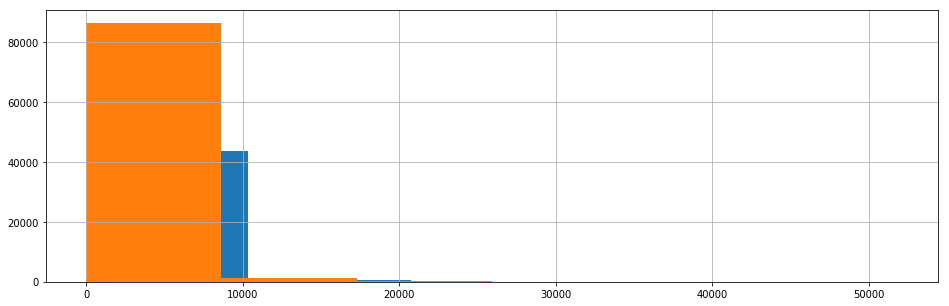

In [17]:
import numpy as np
import pandas
import matplotlib.pyplot as plt
%matplotlib inline

def entries_histogram(turnstile_weather):
    
    
    
    axes=plt.figure(figsize=(16,5))

    turnstile_weather[turnstile_weather['rain']==1]['ENTRIESn_hourly'].hist(bins=5) # your code here to plot a historgram for hourly entries when it is raining
    turnstile_weather[turnstile_weather['rain']==0]['ENTRIESn_hourly'].hist(bins=5) # your code here to plot a histogram for hourly entries when it is not raining
    return plt
LL=entries_histogram(Turnstile_Weather)


### *Exercise 2.7

The data you just plotted is in what kind of distribution? Is there a difference in distribution between rainy and non-rainy days?

** Answer **: Expectely there are large number of entries when its  raining (Denoted by the Orange)in comparision to when its not raining. The distribution in both the cases are positively skewed with larger number are concentrated towards left with few outliers proturding out to the right

### *Exercise 2.8

Build a function that returns:

1. The mean of entries when it's raining
2. The mean of entries when it's not raining




In [18]:
import numpy as np

import pandas

def means(turnstile_weather):
    List1=[] #Entries not raining
    List2=[] #Entries Raiing
    for X in zip(turnstile_weather['rain'],turnstile_weather['ENTRIESn_hourly']):
        if(int(X[0])==1):
            List2.append(int(X[1]))
        else:
            List1.append(int(X[1]))
    with_rain_mean=np.mean(List2)
    without_rain_mean=np.mean(List1)    
    return with_rain_mean, without_rain_mean # leave this line for the grader

means(Turnstile_Weather)

(1105.4463767458733, 1090.278780151855)

Answer to the following questions according to your functions' exits:

1. What is the mean of entries when it's raining?
2. What is the mean of entries when it's not raining?


** Answer **: 
*  The Mean of entries when raining 1105.
*  The mean of entries when not raining 1090

* The mean here is not the Valid Indicator due to nature of the Outliers and difference in  total no of entries

## Exercise 3 - Map Reduce

### *Exercise 3.1*

The entry for this exercise is the same file from the previous session (Exercise 2). You can download the file from this link:

 https://s3.amazonaws.com/content.udacity-data.com/courses/ud359/turnstile_data_master_with_weather.csv

Now, we will create a mapper. For each entry line, the mapper exit must PRINT (not return) UNIT as a key, and the number of ENTRIESn_hourly as the value. Separate the key and the value with a tab. For example: 'R002 \ t105105.0'

Export your mapper into a file named mapper_result.txt and send it with your submission. The code for exporting your mapper is already written in the code bellow.




In [28]:
import sys

def mapper():
    

    for line in sys.stdin:
        try:        #Defensive Program
            X=line.strip().split(",")  #Striping the Components
            if(len(X)==22):    #Checking are they are same contents
                
                print(X[1],X[6],sep='\t')
        except:
            pass


sys.stdin = open('turnstile_data_master_with_weather.csv')
sys.stdout = open('mapper_result.txt', 'w')
mapper()


### *Exercise 3.2*

Now, create the reducer. Given the mapper result from the previous exercise, the reducer must print (not return) one line per UNIT, with the total number of ENTRIESn_hourly during May (which is our data duration), separated by a tab. An example of exit line from the reducer may look like this: 'R001 \ t500625.0'

You can assume that the entry for the reducer is ordered in a way that all lines corresponding to a particular unit are grouped. However, the reducer exit will have repetition, as there are stores that appear in different files' locations.

Export your reducer into a file named reducer_result.txt and send it with your submission.

In [29]:

def reducer():
    Boolean=False
    oldKey=None
    currentKey=None
    salesTotal=0
    for line in sys.stdin:
        if not Boolean:    
            print(line,end="")  #Skipping the first line for Addition
            Boolean=True  #No further Skip Required
            continue
        X=line.strip().split('\t')  #Spliting the Line
        currentKey=X[0]
        if oldKey is None:
            oldKey=currentKey
        if oldKey==currentKey:         #Alogrithm using Two KEYS fOR SUMMATION
            salesTotal+=float(X[1])
            continue
        else:
            print(oldKey,salesTotal,sep='\t')
            salesTotal=0
            oldKey=currentKey
            salesTotal+=float(X[1])
    print(currentKey,salesTotal,sep='\t')  #Final Key Output Here
sys.stdin = open('mapper_result.txt') #Directing Input
sys.stdout = open('reducer_result.txt', 'w') #Directing Output
reducer()
